# Image Classification

In [1]:

import os
import matplotlib.pyplot as plt
import cv2

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [2]:
train_path = "input/"
test_path = "test_images/"

### Collecting Train dataset

In [3]:
labels = []
folder_labels = []
train_img_list = []
train_class_list = []

for folder in os.listdir(train_path):
    folder_labels.append(folder)
    for subclass in os.listdir(train_path + folder):
        img_class = subclass + " (" + folder + ")"
        if img_class not in labels:
            labels.append(img_class)
        for file_name in os.listdir(train_path + folder + "/" + subclass):
            # print(f"{folder} - {subclass} - {file_name}")
            train_class_list.append(labels.index(img_class))
            image_path = train_path + folder + "/" + subclass + "/" + file_name
            train_img_list.append(image_path)

print(folder_labels)
print(labels)

['flowers', 'person_car_cup']
['daffodil (flowers)', 'lily (flowers)', 'rose (flowers)', 'sunflower (flowers)', 'car (person_car_cup)', 'cup (person_car_cup)', 'person (person_car_cup)']


### Getting Train HOG descriptors

In [4]:

train_descriptor_list = []

for image_path in train_img_list:
    img = imread(image_path)
    img = resize(img, (128,64))
    
    descriptor, _ = hog(
        img, orientations=8, pixels_per_cell = (8, 8), 
        cells_per_block = (2, 2), visualize=True, channel_axis=-1
    )

    train_descriptor_list.append(descriptor)

### Create and Fit SVC Model

In [5]:
model = LinearSVC()

model.fit(train_descriptor_list, train_class_list)

LinearSVC()

#### predicting train

In [6]:
train_prediction = model.predict(train_descriptor_list)

## Implement on Test dataset

In [7]:
test_img_list = []
test_class_list = []
test_folder_list = []
class_idx = 0
for idx, folder in enumerate(os.listdir(test_path)):
    for file_name in os.listdir(test_path + folder):
        image_path = test_path + folder + "/" + file_name
        test_img_list.append(image_path)
        test_folder_list.append(idx)
        test_class_list.append(class_idx)
        class_idx += 1

In [8]:

test_descriptor_list = []

for image_path in test_img_list:
    img = imread(image_path)
    img = resize(img, (128,64))
    
    descriptor, _ = hog(
        img, orientations=8, pixels_per_cell = (8, 8), 
        cells_per_block = (2, 2), visualize=True, channel_axis=-1
    )
    test_descriptor_list.append(descriptor)

In [9]:
prediction = model.predict(test_descriptor_list)

In [10]:
for idx, pred in enumerate(prediction):
    if pred < 4:
        prediction[idx] = 0
    else:
        prediction[idx] = 1

print('Model accuracy score (folder class prediction): {}'.format(accuracy_score(test_folder_list, prediction)))

Model accuracy score (folder class prediction): 0.7142857142857143


#### Display Results

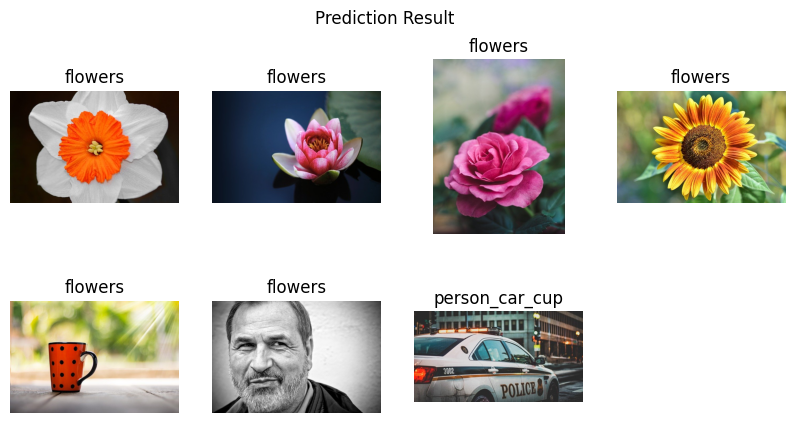

In [11]:

plt.figure(figsize=(10,5))
plt.suptitle('Prediction Result')
for idx, (i, image) in enumerate(zip(prediction, test_img_list)):
    plt.subplot(2,4,(idx+1))
    plt.title(folder_labels[i])
    plt.imshow(cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

The performance of our model can be evaluated by looking at its training classification report, which shows an accuracy of 71%. This metric indicates that the model is able to correctly classify 71% of the training images on average. However, upon further examination of the model's results, it is apparent that there is room for improvement as some images were falsely predicted. To improve the model performance, we may consider increasing the size of our training dataset or fine-tuning our hog descriptors.